In [37]:
#split 50% training, 20% validiation, #30% for testing (LAST PART)
# NORMALISE VERYTHGINT TO BETWEEN 0 and 1
# 

In [38]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
# import datetime as dt


#failure_test = pd.read_csv(r'Failure_modelling\Failure_Data\failure_data.csv', index_col=0)
#pipe_test= pd.read_csv(r'Failure_modelling\Failure_Data\pipe_data.csv', index_col=0)
failure_training = pd.read_csv(r'Failure_modelling\Failure_Data\failure_train.csv', index_col=0)
pipe_train = pd.read_csv(r'Failure_modelling\Failure_Data\pipes_train.csv', index_col=0)

pipe_train.Aanlegjaar = pd.to_datetime(pipe_train.Aanlegjaar, format='%Y')

failure_training.storing_melddatum = pd.to_datetime(failure_training.storing_melddatum)
failure_training.storing_aanlegjaar = pd.to_datetime(failure_training.storing_aanlegjaar)

failure_train = failure_training[failure_training.storing_melddatum.dt.year < 2019]

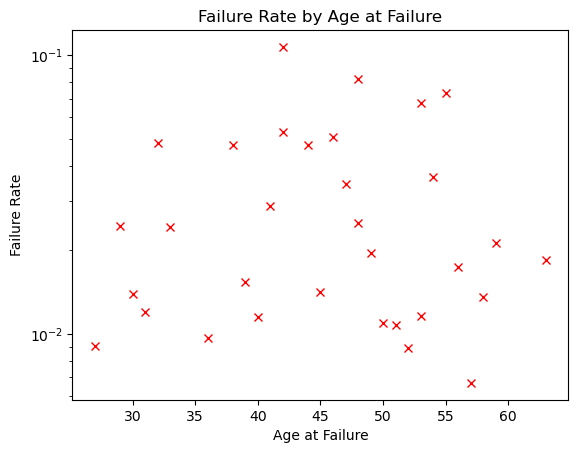

In [39]:
failure_rate_years = {}
for year in range(2010, 2019):
    failures_in_year = failure_train[failure_train.storing_melddatum.dt.year == year]
    failures_count_age_diameter = pd.DataFrame(failures_in_year.groupby(['age_at_failure', 'Diameter_group'])['storing_materiaal'].count()).reset_index()
    failures_count_age_diameter.rename(columns={'storing_materiaal': 'failure_count'}, inplace=True)
    
    pipe_train['age_in_year'] = year - pipe_train.Aanlegjaar.dt.year
    pipes_sum_length_age_diameter = pd.DataFrame(pipe_train.groupby(['age_in_year', 'Diameter_group'])['Lengte'].sum() / 1000).reset_index()
    failure_overview = pd.merge(failures_count_age_diameter, pipes_sum_length_age_diameter, left_on=['age_at_failure', 'Diameter_group'], right_on=['age_in_year', 'Diameter_group'], how='left')
    failure_overview.drop(['age_in_year'], axis=1, inplace=True)
    failure_overview['failure_rate_age'] = failure_overview['failure_count'] / failure_overview['Lengte']
    failure_rate_years[year] = failure_overview
plt.plot(failure_overview.age_at_failure, failure_overview.failure_rate_age, 'rx')
plt.yscale('log')
plt.xlabel('Age at Failure')
plt.ylabel('Failure Rate')
plt.title('Failure Rate by Age at Failure')
plt.show()

In [40]:
all_failure_rate_years = pd.DataFrame()


for i, key in enumerate(failure_rate_years.keys()):
    if all_failure_rate_years.empty:
        all_failure_rate_years = failure_rate_years[key][["age_at_failure", "Diameter_group", "failure_rate_age"]].copy()
    else:
        all_failure_rate_years = pd.merge(
            all_failure_rate_years, 
            failure_rate_years[key][["age_at_failure", "Diameter_group", "failure_rate_age"]], 
            how="outer", 
            on=["age_at_failure", "Diameter_group"], 
            suffixes=('', f'_{key}')
        )

all_failure_rate_years.rename(columns={"failure_rate_age": "failure_rate_age_2010"}, inplace=True)

all_failure_rate_years.head()


,age_at_failure,Diameter_group,failure_rate_age_2010,failure_rate_age_2011,failure_rate_age_2012,failure_rate_age_2013,failure_rate_age_2014,failure_rate_age_2015,failure_rate_age_2016,failure_rate_age_2017,failure_rate_age_2018
0,22.0,0 - 160,0.027909,0.012230,0.017372,0.009059,NaN,NaN,NaN,NaN,NaN
1,22.0,160 - 300,0.042577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.0,0 - 160,0.048278,NaN,NaN,NaN,NaN,NaN,0.018118,NaN,NaN
3,27.0,0 - 160,0.031029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009059
4,28.0,0 - 160,0.029044,0.031029,0.016275,0.024139,NaN,0.023958,NaN,NaN,NaN
